### February 8, 2021 
# Assignment One 
## MSCA 32003 Marketing for Analytics 
### Wilson McDermott, Samantha Patil, Oluwafemi Fabiyi


# Data Cleaning and Set-Up:

In [4]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from factor_analyzer import FactorAnalyzer
import os

In [6]:
MedData = pd.read_csv('Medicine_data_with_ID.csv').fillna(0)
dfclean = MedData.loc[~(MedData==0).all(axis=1)].astype(str)[1:].iloc[:, :]
dfclean

,ID,Constantly under stress,Stuggle with work-life balance,Symptoms don't slow me down,Concerned about interaction of medicine w/Rx,Concerned about interaction of medicine w/alcohol,Lookout for newest medicine,Waging war on symptoms,Need Fast acting medicine,Don't care about cost if works,Medicine that won't upset stomach,Need long lasting affect,Get info on different medicine from family and friends,Carry medicince everywhere,Medicine at first sign of symptoms,Need strong medicine,Interested in all alternate medicine
1,1128.0,3_to_4,5_to_6,1_to_2,1_to_2,5_to_6,5_to_6,5_to_6,5_to_6,1_to_2,1_to_2,5_to_6,1_to_2,5_to_6,5_to_6,5_to_6,1_to_2
2,1836.0,1_to_2,1_to_2,1_to_2,1_to_2,5_to_6,5_to_6,3_to_4,1_to_2,1_to_2,1_to_2,1_to_2,1_to_2,3_to_4,3_to_4,1_to_2,1_to_2
3,2379.0,1_to_2,5_to_6,3_to_4,1_to_2,5_to_6,3_to_4,3_to_4,3_to_4,3_to_4,1_to_2,3_to_4,3_to_4,3_to_4,3_to_4,5_to_6,3_to_4
4,2917.0,3_to_4,3_to_4,3_to_4,1_to_2,1_to_2,3_to_4,3_to_4,1_to_2,3_to_4,3_to_4,3_to_4,5_to_6,3_to_4,3_to_4,1_to_2,3_to_4
5,3247.0,1_to_2,1_to_2,3_to_4,5_to_6,5_to_6,5_to_6,3_to_4,3_to_4,3_to_4,3_to_4,5_to_6,3_to_4,3_to_4,3_to_4,3_to_4,1_to_2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
344,342809.0,3_to_4,5_to_6,No ans.,No ans.,No ans.,No ans.,No ans.,3_to_4,No ans.,No ans.,No ans.,No ans.,No ans.,No ans.,5_to_6,1_to_2
345,343149.0,3_to_4,5_to_6,3_to_4,1_to_2,1_to_2,1_to_2,1_to_2,1_to_2,1_to_2,1_to_2,1_to_2,1_to_2,5_to_6,1_to_2,1_to_2,3_to_4
346,343513.0,1_to_2,3_to_4,1_to_2,3_to_4,5_to_6,5_to_6,1_to_2,1_to_2,1_to_2,1_to_2,5_to_6,5_to_6,5_to_6,5_to_6,3_to_4,1_to_2
347,343647.0,3_to_4,No ans.,1_to_2,3_to_4,3_to_4,3_to_4,1_to_2,1_to_2,1_to_2,3_to_4,1_to_2,1_to_2,5_to_6,1_to_2,3_to_4,5_to_6


In [28]:
from sklearn import preprocessing
df = dfclean.apply(preprocessing.LabelEncoder().fit_transform)

In [29]:
df

,ID,Constantly under stress,Stuggle with work-life balance,Symptoms don't slow me down,Concerned about interaction of medicine w/Rx,Concerned about interaction of medicine w/alcohol,Lookout for newest medicine,Waging war on symptoms,Need Fast acting medicine,Don't care about cost if works,Medicine that won't upset stomach,Need long lasting affect,Get info on different medicine from family and friends,Carry medicince everywhere,Medicine at first sign of symptoms,Need strong medicine,Interested in all alternate medicine
1,9,1,2,0,0,2,2,2,2,0,0,2,0,2,2,2,0
2,65,0,0,0,0,2,2,1,0,0,0,0,0,1,1,0,0
3,131,0,2,1,0,2,1,1,1,1,0,1,1,1,1,2,1
4,193,1,1,1,0,0,1,1,0,1,1,1,2,1,1,0,1
5,229,0,0,1,2,2,2,1,1,1,1,2,1,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
344,254,1,2,3,3,3,3,3,1,3,3,3,3,3,3,2,0
345,255,1,2,1,0,0,0,0,0,0,0,0,0,2,0,0,1
346,256,0,1,0,1,2,2,0,0,0,0,2,2,2,2,1,0
347,257,1,3,0,1,1,1,0,0,0,1,0,0,2,0,1,2


In [9]:
columnStatistics = pd.DataFrame(df.max(axis=0)) # will return max value of each column
columnStatistics.columns = ['MaxValues']

columnStatistics['MinValues'] = df.min(axis=0) # will return min value of each column

uniqueCounts = pd.DataFrame(columnStatistics.index)
uniqueCounts.set_index(0, inplace=True)
uniqueCounts['UniqueValues'] = np.nan
for col in df:
    uniqueCounts.loc[col]['UniqueValues'] = df[col].nunique() # will return min value of each column
columnStatistics['UniqueValues'] = uniqueCounts['UniqueValues']

columnStatistics

,MaxValues,MinValues,UniqueValues
ID,347,0,348.0
Constantly under stress,3,0,4.0
Stuggle with work-life balance,3,0,4.0
Symptoms don't slow me down,3,0,4.0
Concerned about interaction of medicine w/Rx,3,0,4.0
Concerned about interaction of medicine w/alcohol,3,0,4.0
Lookout for newest medicine,3,0,4.0
Waging war on symptoms,3,0,4.0
Need Fast acting medicine,3,0,4.0
Don't care about cost if works,3,0,4.0


The goal of the above is to confirm the answer scale. As shown, we are able to see that for each of the seventeen questions we have four unique value answers ranging from 0 to 3 with 347 respondants (the first two rows are the heading and variable category plus an empty ID). 

In [30]:
df.set_index('ID')

,Constantly under stress,Stuggle with work-life balance,Symptoms don't slow me down,Concerned about interaction of medicine w/Rx,Concerned about interaction of medicine w/alcohol,Lookout for newest medicine,Waging war on symptoms,Need Fast acting medicine,Don't care about cost if works,Medicine that won't upset stomach,Need long lasting affect,Get info on different medicine from family and friends,Carry medicince everywhere,Medicine at first sign of symptoms,Need strong medicine,Interested in all alternate medicine
ID,,,,,,,,,,,,,,,,
9,1,2,0,0,2,2,2,2,0,0,2,0,2,2,2,0
65,0,0,0,0,2,2,1,0,0,0,0,0,1,1,0,0
131,0,2,1,0,2,1,1,1,1,0,1,1,1,1,2,1
193,1,1,1,0,0,1,1,0,1,1,1,2,1,1,0,1
229,0,0,1,2,2,2,1,1,1,1,2,1,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
254,1,2,3,3,3,3,3,1,3,3,3,3,3,3,2,0
255,1,2,1,0,0,0,0,0,0,0,0,0,2,0,0,1
256,0,1,0,1,2,2,0,0,0,0,2,2,2,2,1,0


As our team prepared our data we made the decision that we did not want to include the ID column as part of the analysis. However, we also felt that it was important to maintain the ID for reference purposes for each of the respondants. As such, we made it the index for our dataframe.

# Primary Component Analyis ("PCA"):

## Leveraging PCA to group respondents into populations based on Likert questions

In [11]:
#using PCA to calculate conversion matrix for potential segments 
covar_matrix = PCA(n_components = len(df.columns)) #components are equal to the number of features we have
covar_matrix.fit(df)

PCA(n_components=17)

In [12]:
covar_matrix = PCA(copy=True, iterated_power='auto', n_components=len(df.columns), random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)
covar_matrix.fit

<bound method PCA.fit of PCA(n_components=17)>

### Validation:

In order to confirm that the survey allows us to put repondents into unique segments we leveraged PCA to analyze the level of variance explained by the number of potential features.

In [13]:
covar_matrixVal = PCA(copy=True, iterated_power='auto', n_components=len(df.columns), random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)
covar_matrixValfit = covar_matrixVal.fit(df)

In [27]:
variance = covar_matrixVal.explained_variance_ratio_ #calculate variance ratios
variance

array([9.99017770e-01, 1.87308563e-04, 9.35381620e-05, 8.23424612e-05,
       7.10930148e-05, 6.84822836e-05, 6.61652286e-05, 5.90857419e-05,
       5.37547613e-05, 4.75473025e-05, 4.56101034e-05, 4.28040891e-05,
       4.11841826e-05, 3.42443175e-05, 3.16089490e-05, 2.98186774e-05,
       2.76423594e-05])

In [15]:
var=np.cumsum(np.round(variance, decimals=5)*100)
var

array([ 99.902,  99.921,  99.93 ,  99.938,  99.945,  99.952,  99.959,
        99.965,  99.97 ,  99.975,  99.98 ,  99.984,  99.988,  99.991,
        99.994,  99.997, 100.   ])

Next, as part of our validation process, we wanted to make sure that the components identified by PCA are unique populations (i.e., if PCA shows "Medicine that won't upset stomach" as the top two features then the population is not being segmented very well). As such, we looked at the top three features for each component:

In [16]:
covar_matrixVal2 = PCA(copy=True, iterated_power='auto', n_components=16, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)
covar_matrixValfit2 = covar_matrixVal2.fit(df)

In [17]:
import warnings
warnings.filterwarnings("ignore") # We do this to ignore several specific Pandas warnings 

cols = df.columns
components = pd.DataFrame(covar_matrixVal2.components_ ,columns = cols)
componentsclean = components.iloc[:,1:] #we do this to ensure that "ID" is NOT included as a feature
componentsclean.rename(index = lambda x: 'PC-' + str(x + 1), inplace=True)

# Top 3 positive contributors
TopThree = pd.DataFrame(componentsclean.columns.values[np.argsort(-componentsclean.values, axis=1)[:, :3]], 
                  index=componentsclean.index,
                  columns = ['1st Max','2nd Max','3rd Max'])
TopThree

,1st Max,2nd Max,3rd Max
PC-1,Concerned about interaction of medicine w/Rx,Waging war on symptoms,Medicine at first sign of symptoms
PC-2,Medicine that won't upset stomach,Concerned about interaction of medicine w/alcohol,Need Fast acting medicine
PC-3,Concerned about interaction of medicine w/Rx,Concerned about interaction of medicine w/alcohol,Symptoms don't slow me down
PC-4,Medicine at first sign of symptoms,Carry medicince everywhere,Need strong medicine
PC-5,Concerned about interaction of medicine w/alcohol,Stuggle with work-life balance,Constantly under stress
PC-6,Don't care about cost if works,Waging war on symptoms,Symptoms don't slow me down
PC-7,Need strong medicine,Don't care about cost if works,Waging war on symptoms
PC-8,Concerned about interaction of medicine w/Rx,Need Fast acting medicine,Medicine at first sign of symptoms
PC-9,Symptoms don't slow me down,Need long lasting affect,Medicine that won't upset stomach
PC-10,Don't care about cost if works,Get info on different medicine from family and...,Stuggle with work-life balance


## Checking Correlation of Questions:

In [18]:
df.corr()

,ID,Constantly under stress,Stuggle with work-life balance,Symptoms don't slow me down,Concerned about interaction of medicine w/Rx,Concerned about interaction of medicine w/alcohol,Lookout for newest medicine,Waging war on symptoms,Need Fast acting medicine,Don't care about cost if works,Medicine that won't upset stomach,Need long lasting affect,Get info on different medicine from family and friends,Carry medicince everywhere,Medicine at first sign of symptoms,Need strong medicine,Interested in all alternate medicine
ID,1.000000,-0.044836,-0.060538,-0.015872,0.090174,0.005728,-0.105481,0.040368,-0.029321,-0.053084,-0.070565,-0.038065,-0.019936,-0.107341,0.031997,-0.103322,-0.003987
Constantly under stress,-0.044836,1.000000,0.412610,0.019296,0.026938,0.087481,0.149964,0.050379,0.197805,0.019927,0.135452,0.022367,0.028360,0.101510,0.017842,0.178915,0.086667
Stuggle with work-life balance,-0.060538,0.412610,1.000000,-0.023253,-0.040133,0.067109,0.087128,-0.009697,0.122375,0.032399,0.097622,0.091539,0.054604,0.070200,-0.051495,0.126101,0.121687
Symptoms don't slow me down,-0.015872,0.019296,-0.023253,1.000000,0.037544,0.095472,0.040207,0.170302,-0.039406,0.094151,0.131744,0.027990,0.115241,0.043954,-0.054715,-0.058380,0.022270
Concerned about interaction of medicine w/Rx,0.090174,0.026938,-0.040133,0.037544,1.000000,0.220306,0.078548,0.088108,0.123656,0.101218,0.279731,0.083389,0.135728,0.040278,0.104248,-0.065537,0.061652
Concerned about interaction of medicine w/alcohol,0.005728,0.087481,0.067109,0.095472,0.220306,1.000000,0.156683,0.187939,0.177706,0.060857,0.216235,0.315897,0.100370,0.112269,0.125984,0.104063,0.075980
Lookout for newest medicine,-0.105481,0.149964,0.087128,0.040207,0.078548,0.156683,1.000000,0.132705,0.215371,0.131751,0.176654,0.216505,0.085403,0.160820,0.124454,0.186609,0.066177
Waging war on symptoms,0.040368,0.050379,-0.009697,0.170302,0.088108,0.187939,0.132705,1.000000,0.073780,0.154938,0.178367,0.107857,0.047160,0.042922,0.135511,0.094086,0.101256
Need Fast acting medicine,-0.029321,0.197805,0.122375,-0.039406,0.123656,0.177706,0.215371,0.073780,1.000000,0.055947,0.358446,0.401600,0.177151,0.184962,0.067070,0.390731,0.206111
Don't care about cost if works,-0.053084,0.019927,0.032399,0.094151,0.101218,0.060857,0.131751,0.154938,0.055947,1.000000,0.131580,0.075317,0.079278,0.050112,0.112506,0.197598,0.094979


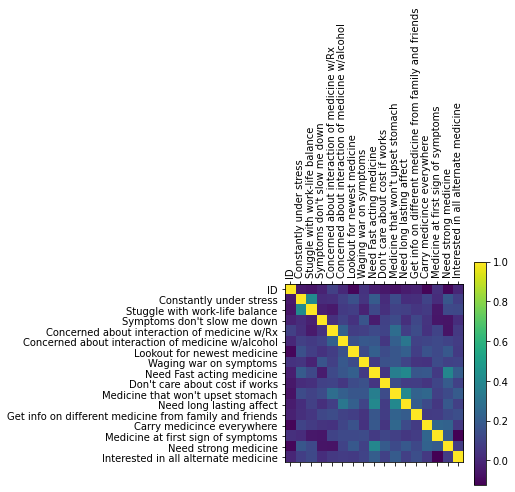

In [19]:
plt.matshow(df.corr())
plt.xticks(range(len(df.columns)), df.columns, rotation='vertical')
plt.yticks(range(len(df.columns)), df.columns)
plt.colorbar()
plt.show()

In the above, darker is good because shows independence / less correlation. As shown, the questions "Constantly under stress" and "Struggle with work-life balance" are highly correlated and not independent. 

## Using FA to Create Segments:

After verifying that segmentation is possible with the survey results, we began analyzing the potential segments. In order to do so we used fa (https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.FactorAnalysis.html) to create and verify our segments. 

In [20]:
fa = FactorAnalyzer(rotation=None, n_factors=len(df.columns))
fa.fit(df)

# Check Eigenvalues
ev, v = fa.get_eigenvalues()
ev

array([2.95835899, 1.51545826, 1.33652197, 1.18614869, 1.11768934,
       1.02905528, 0.97453564, 0.91928083, 0.88358153, 0.80406573,
       0.78844683, 0.74367846, 0.7170534 , 0.58460405, 0.54021466,
       0.46791447, 0.43339186])

### Segment Support: 

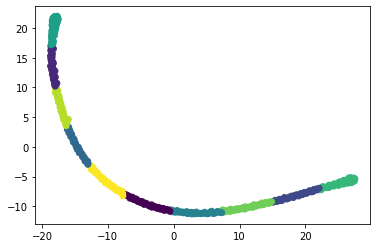

In [21]:
#T-SNE plot 
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

k_means = KMeans(n_clusters=10, n_init=10)
k_means.fit(df)

labels= k_means.predict(df)

model=TSNE(learning_rate=100)
Tsne_transformed=model.fit_transform(df)

questions = df.columns[1:]
xs =Tsne_transformed[:,0]
ys=Tsne_transformed[:,1]
plt.scatter(xs,ys, c = labels)
plt.show()

Based on the T-SNE plot above, we can see that with ten potential segments some clusters are closer than others and follow a parabola-like distance from one another.

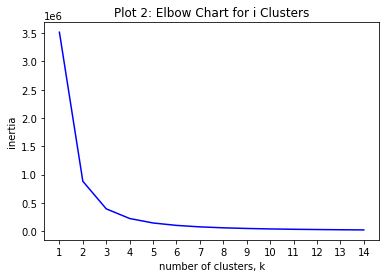

In [22]:
from kmodes import kmodes
from sklearn.cluster import KMeans

krange = range(1, 15)
xinertias = []

for i in krange:
    
    xmodel = KMeans(n_clusters=i)
    xmodel.fit(df)
    xinertias.append(xmodel.inertia_)
    
plt.plot(krange, xinertias, 'b')
plt.title("Plot 2: Elbow Chart for i Clusters")
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(krange)
plt.show()

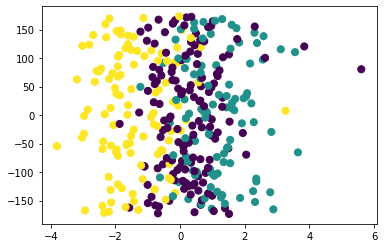

In [23]:
x = df.reset_index().values

km = kmodes.KModes(n_clusters=3, init='Huang', n_init=5, verbose=0)
clusters = km.fit_predict(x)
df['clusters'] = clusters
# Turn the dummified df into two columns with PCA

pca = PCA(2)
plot_columns = pca.fit_transform(df)

# Plot based on the two dimensions, and shade by cluster label
plt.scatter(x=plot_columns[:,1], y=plot_columns[:,0], c=df["clusters"], s=50)
plt.show()

Text(0, 0.5, 'EPS')

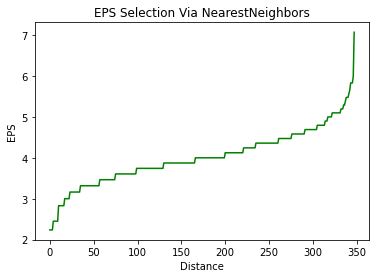

In [24]:
from sklearn.neighbors import NearestNeighbors

neighborhood = NearestNeighbors()
neighbors = neighborhood.fit(df)

distances, indx = neighbors.kneighbors(df)

distances = np.sort(distances, axis = 0)
distances = distances[:,1]

plt.plot(distances,'g')
plt.title("EPS Selection Via NearestNeighbors")
plt.xlabel("Distance")
plt.ylabel("EPS")

As vizualized above, applying DBSCAN would require a significant EPS. As such we have chosen not to include DBSCAN further in this analysis.

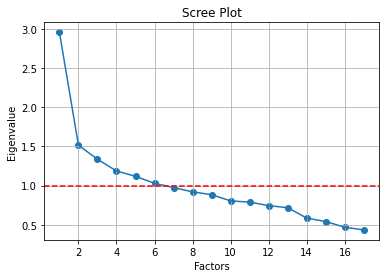

In [25]:
plt.scatter(range(1,18),ev) # 18 = 17 questions + 1 for distribution
plt.plot(range(1,18),ev)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.axhline(y=1, color='r', linestyle='--')
plt.grid()
plt.show()

First we assume five segments based on the above 

In [31]:
#Create Segments and Review Loadings

fa = FactorAnalyzer(rotation="varimax", n_factors=5)
fa.fit(df)

# Check loadings
loadings = pd.DataFrame(fa.loadings_)
loadings.rename(columns = lambda x: 'Segment-' + str(x + 1), inplace=True)
loadings.index = df.columns
loadings

,Segment-1,Segment-2,Segment-3,Segment-4,Segment-5
ID,-0.011566,-0.041944,0.033540,-0.198194,-0.026125
Constantly under stress,0.049123,0.991981,0.065890,0.061007,0.040532
Stuggle with work-life balance,0.094801,0.405815,-0.059585,0.135646,-0.017813
Symptoms don't slow me down,0.062228,0.000480,-0.079637,-0.060397,0.379850
Concerned about interaction of medicine w/Rx,0.332727,0.006732,0.097055,-0.238543,0.167112
Concerned about interaction of medicine w/alcohol,0.386874,0.057479,0.107068,-0.033953,0.178466
Lookout for newest medicine,0.254528,0.110289,0.109443,0.196815,0.147040
Waging war on symptoms,0.157754,0.012417,0.096978,0.036549,0.396112
Need Fast acting medicine,0.588967,0.140196,0.022453,0.336676,-0.132162
Don't care about cost if works,0.083751,-0.010502,0.076786,0.203833,0.335160


In the above table, each factor can be considered a segment and represents a distinct population. If we remove everything that is less than .4 (positively or negatively), we end up with the below table:

In [32]:
segments = loadings[loadings >= .4].fillna(loadings[loadings <= -.4])
segments

,Segment-1,Segment-2,Segment-3,Segment-4,Segment-5
ID,NaN,NaN,NaN,NaN,NaN
Constantly under stress,NaN,0.991981,NaN,NaN,NaN
Stuggle with work-life balance,NaN,0.405815,NaN,NaN,NaN
Symptoms don't slow me down,NaN,NaN,NaN,NaN,NaN
Concerned about interaction of medicine w/Rx,NaN,NaN,NaN,NaN,NaN
Concerned about interaction of medicine w/alcohol,NaN,NaN,NaN,NaN,NaN
Lookout for newest medicine,NaN,NaN,NaN,NaN,NaN
Waging war on symptoms,NaN,NaN,NaN,NaN,NaN
Need Fast acting medicine,0.588967,NaN,NaN,NaN,NaN
Don't care about cost if works,NaN,NaN,NaN,NaN,NaN


In [33]:
segment_names = ['Strong & Sensitive', 'Anxious', 'Hypocondriacs', 'Fast & Furious', 'Warriors']
segments.columns = segment_names
segments

,Strong & Sensitive,Anxious,Hypocondriacs,Fast & Furious,Warriors
ID,NaN,NaN,NaN,NaN,NaN
Constantly under stress,NaN,0.991981,NaN,NaN,NaN
Stuggle with work-life balance,NaN,0.405815,NaN,NaN,NaN
Symptoms don't slow me down,NaN,NaN,NaN,NaN,NaN
Concerned about interaction of medicine w/Rx,NaN,NaN,NaN,NaN,NaN
Concerned about interaction of medicine w/alcohol,NaN,NaN,NaN,NaN,NaN
Lookout for newest medicine,NaN,NaN,NaN,NaN,NaN
Waging war on symptoms,NaN,NaN,NaN,NaN,NaN
Need Fast acting medicine,0.588967,NaN,NaN,NaN,NaN
Don't care about cost if works,NaN,NaN,NaN,NaN,NaN


"Warriors" is based on the fifth segment's highest contributing feature of "Waging war on symptoms"

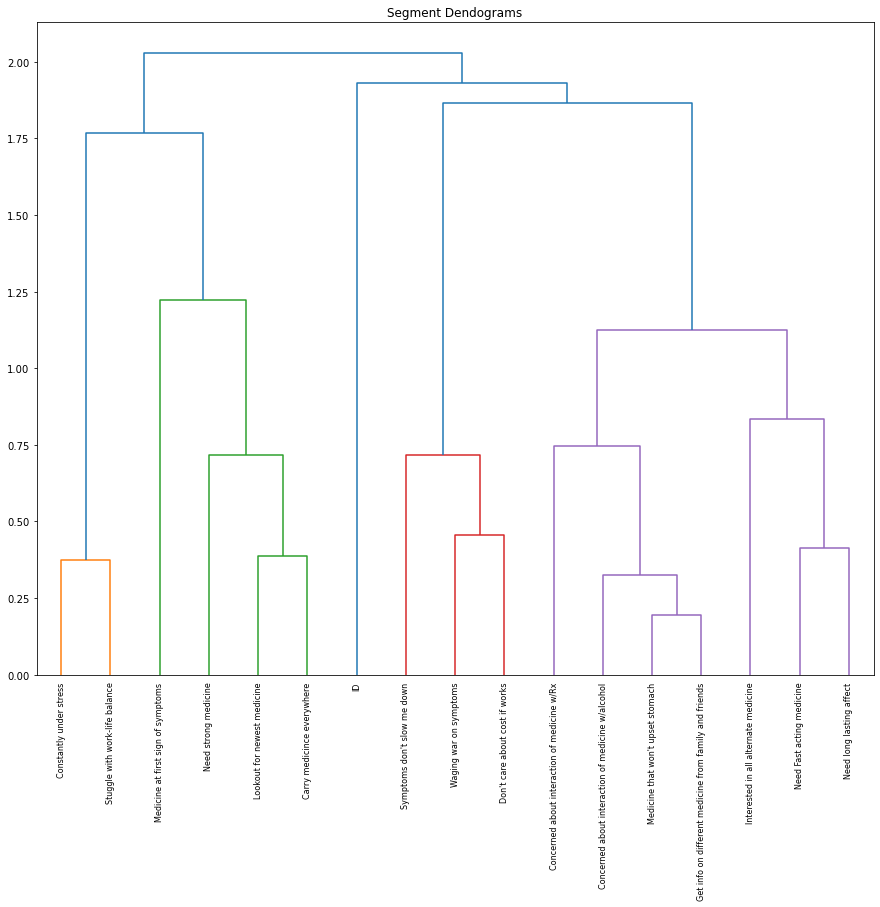

In [36]:
from sklearn.preprocessing import normalize
from scipy.cluster.hierarchy import linkage, dendrogram

movementss=loadings.values
normalized_movements = normalize(movementss)
plt.figure(figsize=(15,12))

mergings = linkage(normalized_movements, method='ward')
names = list(loadings.index)

dendrogram(
    mergings,
    labels=names,
    leaf_rotation=90.,
    leaf_font_size=8
)

plt.title("Segment Dendograms")
plt.show()

In [37]:
# Check variance
factorVariance = pd.DataFrame(fa.get_factor_variance())
factorVariance.rename(columns = lambda x: 'Segment-' + str(x + 1), inplace=True)
factorVariance.index = ['SS Loadings', 'Proportion Variance', 'Cumulative Variance']
factorVariance

,Segment-1,Segment-2,Segment-3,Segment-4,Segment-5
SS Loadings,1.737340,1.223049,0.998526,0.833184,0.597488
Proportion Variance,0.102196,0.071944,0.058737,0.049011,0.035146
Cumulative Variance,0.102196,0.174141,0.232877,0.281888,0.317035


Need to alter number of segments as only accounting for approximately 30% of variance with five segments.

In [38]:
#10 segments

fa2 = FactorAnalyzer(rotation="varimax", n_factors=10)
fa2.fit(df)

# Check loadings
loadings2 = pd.DataFrame(fa2.loadings_)
loadings2.rename(columns = lambda x: 'Segment-' + str(x + 1), inplace=True)
loadings2.index = df.columns
loadings2

,Segment-1,Segment-2,Segment-3,Segment-4,Segment-5,Segment-6,Segment-7,Segment-8,Segment-9,Segment-10
ID,-0.018965,0.060923,-0.001856,-0.007820,-0.044992,0.064376,0.008425,0.054553,-0.308292,-0.103163
Constantly under stress,-0.006979,0.046795,0.105619,0.025951,0.778836,0.037050,0.007616,0.065818,0.074348,0.000776
Stuggle with work-life balance,0.060221,-0.041932,0.016331,-0.028734,0.528780,-0.044684,0.118543,-0.030891,0.067113,0.042506
Symptoms don't slow me down,0.030740,0.015711,-0.042962,0.983885,-0.014633,-0.040395,0.075450,0.113916,0.035065,0.050153
Concerned about interaction of medicine w/Rx,0.079222,0.977467,0.018747,0.008041,-0.024784,0.056831,0.127886,0.043251,-0.083768,0.061562
Concerned about interaction of medicine w/alcohol,0.291964,0.172998,0.068477,0.056268,0.080186,0.102225,0.083501,0.202658,0.051706,0.037525
Lookout for newest medicine,0.170413,0.064111,0.125704,0.011891,0.127974,0.078576,0.031786,0.137714,0.226149,0.174652
Waging war on symptoms,0.077531,0.025454,0.016303,0.083530,0.001299,0.073717,0.083737,0.676830,-0.041664,0.141873
Need Fast acting medicine,0.220627,0.065051,0.926085,-0.032425,0.115299,0.026143,0.249295,0.032858,0.082289,0.021340
Don't care about cost if works,0.024866,0.055672,-0.000358,0.045346,0.001035,0.051857,0.119133,0.113452,0.079765,0.449849


In [39]:
segments2 = loadings2[loadings2 >= .4].fillna(loadings2[loadings2 <= -.4])
segments2

,Segment-1,Segment-2,Segment-3,Segment-4,Segment-5,Segment-6,Segment-7,Segment-8,Segment-9,Segment-10
ID,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Constantly under stress,NaN,NaN,NaN,NaN,0.778836,NaN,NaN,NaN,NaN,NaN
Stuggle with work-life balance,NaN,NaN,NaN,NaN,0.528780,NaN,NaN,NaN,NaN,NaN
Symptoms don't slow me down,NaN,NaN,NaN,0.983885,NaN,NaN,NaN,NaN,NaN,NaN
Concerned about interaction of medicine w/Rx,NaN,0.977467,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Concerned about interaction of medicine w/alcohol,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Lookout for newest medicine,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Waging war on symptoms,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.67683,NaN,NaN
Need Fast acting medicine,NaN,NaN,0.926085,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Don't care about cost if works,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.449849


In [40]:
segment2_names = ['Longevity', 'Safety First', 'Fast & Furious', 'Cant Stop Wont Stop','Anxious', 'Hypocondriacs','Homeopathic Helpers', 'Warriors', 'Prepared', 'Price Insensitive']
segments2.columns = segment2_names
segments2

,Longevity,Safety First,Fast & Furious,Cant Stop Wont Stop,Anxious,Hypocondriacs,Homeopathic Helpers,Warriors,Prepared,Price Insensitive
ID,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Constantly under stress,NaN,NaN,NaN,NaN,0.778836,NaN,NaN,NaN,NaN,NaN
Stuggle with work-life balance,NaN,NaN,NaN,NaN,0.528780,NaN,NaN,NaN,NaN,NaN
Symptoms don't slow me down,NaN,NaN,NaN,0.983885,NaN,NaN,NaN,NaN,NaN,NaN
Concerned about interaction of medicine w/Rx,NaN,0.977467,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Concerned about interaction of medicine w/alcohol,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Lookout for newest medicine,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Waging war on symptoms,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.67683,NaN,NaN
Need Fast acting medicine,NaN,NaN,0.926085,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Don't care about cost if works,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.449849


As shown above, we found ten unique segments and their key needs. while this information is extremely helpful for medicine-specific use cases, we could also apply this to broader product categories. For example, we could use data from the "Longevity" segment to target the same segment with long-lasting hairspray. 

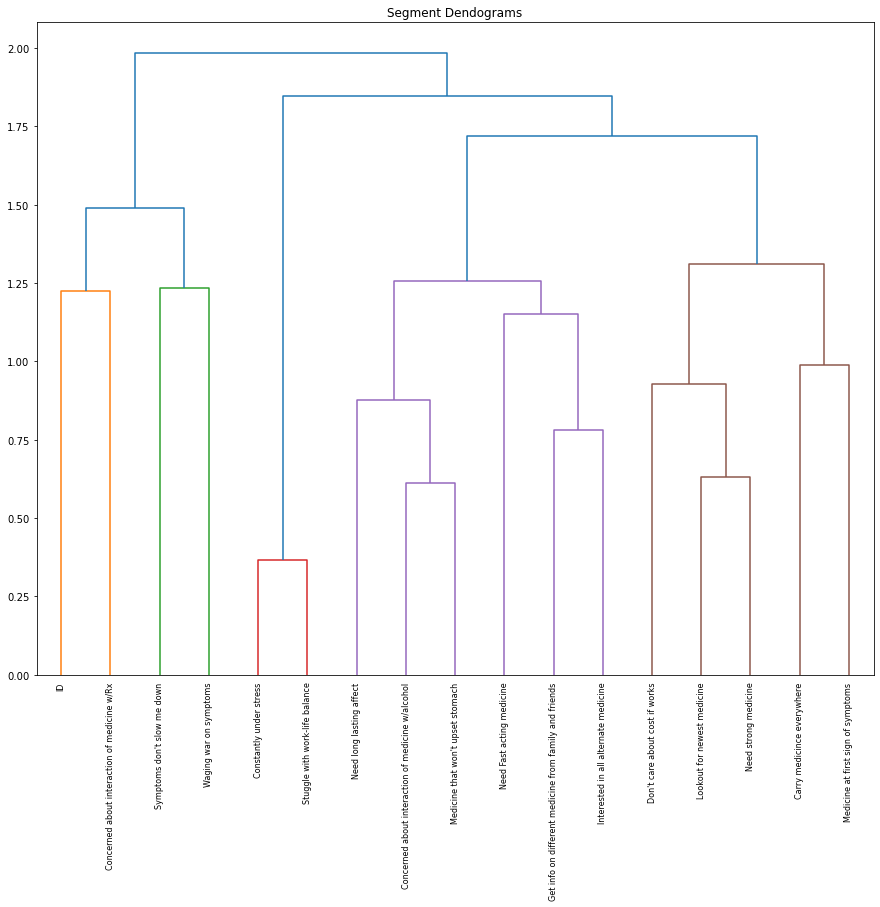

In [41]:
from sklearn.preprocessing import normalize

movementss=loadings2.values
normalized_movements = normalize(movementss)
plt.figure(figsize=(15,12))

mergings = linkage(normalized_movements, method='ward')
names = list(loadings2.index)

dendrogram(
    mergings,
    labels=names,
    leaf_rotation=90.,
    leaf_font_size=8
)

plt.title("Segment Dendograms")
plt.show()

In [42]:
# Check variance
factorVariance = pd.DataFrame(fa2.get_factor_variance())
factorVariance.rename(columns = lambda x: 'Segment-' + str(x + 1), inplace=True)
factorVariance.index = ['SS Loadings', 'Proportion Variance', 'Cumulative Variance']
factorVariance

,Segment-1,Segment-2,Segment-3,Segment-4,Segment-5,Segment-6,Segment-7,Segment-8,Segment-9,Segment-10
SS Loadings,1.248586,1.073786,1.069335,1.005053,0.969952,0.796800,0.653528,0.603740,0.532104,0.434496
Proportion Variance,0.073446,0.063164,0.062902,0.059121,0.057056,0.046871,0.038443,0.035514,0.031300,0.025559
Cumulative Variance,0.073446,0.136610,0.199512,0.258633,0.315689,0.362560,0.401002,0.436516,0.467817,0.493375


With ten segments we are able to account for 50% of the variance and clearly identify unique needs for each of the segments. Our team decided not to add additional segments as the more segments we add the less unique they become due to the overlap of needs. 

In [43]:
# Data mapped to factors
TransformedDF = df
factor_scoresFinal = pd.DataFrame(fa2.transform(TransformedDF))
factor_scoresFinal.columns = segment2_names
factor_scoresFinal['ID'] = TransformedDF.index
df_export = pd.merge(TransformedDF, factor_scoresFinal, on='ID')
df_export['Primary Segment'] = df_export[segment2_names].idxmax(axis=1)
df_export.to_csv('Data_Scored.csv', index=False)

# Correlation matrix
correlation_export = TransformedDF.corr().unstack().reset_index(name='value')
correlation_export.columns = ['Feature 1', 'Feature 2', 'Value']
correlation_export.to_csv('Correlations.csv', index=False)

# Loadings
loadings2.columns = segment2_names
loadings_export = loadings2.unstack().reset_index(name='value')
loadings_export.columns = ['Segment', 'Feature', 'Value']
loadings_export.to_csv('Loadings.csv', index=False)

In [64]:
SegmentSize = pd.DataFrame(df_export["Primary Segment"].value_counts())

In [148]:
SegmentSize = pd.DataFrame(df_export["Primary Segment"].value_counts())
SegmentSize["% of Whole"] = ((SegmentSize["Primary Segment"]/sum(SegmentSize["Primary Segment"]))*100).round(0)
SegmentSize.loc["Sum"] = [sum(SegmentSize["Primary Segment"]),sum(SegmentSize["% of Whole"])]
SegmentSize

,Primary Segment,% of Whole
Cant Stop Wont Stop,68.0,20.0
Safety First,63.0,18.0
Fast & Furious,50.0,14.0
Anxious,44.0,13.0
Longevity,36.0,10.0
Hypocondriacs,26.0,7.0
Prepared,20.0,6.0
Warriors,16.0,5.0
Price Insensitive,14.0,4.0
Homeopathic Helpers,10.0,3.0


In [136]:
Composition = pd.pivot_table(loadings2,index = [MedData.iloc[0],loadings2.index])[1:]
Composition

Anxious  \
0                                                                
A Concerned about interaction of medicine w/Rx       -0.024784   
  Concerned about interaction of medicine w/alcohol   0.080186   
  Don't care about cost if works                      0.001035   
  Interested in all alternate medicine                0.098883   
  Symptoms don't slow me down                        -0.014633   
B Carry medicince everywhere                          0.058454   
  Get info on different medicine from family and ...  0.020074   
  Lookout for newest medicine                         0.127974   
  Medicine at first sign of symptoms                 -0.033452   
  Waging war on symptoms                              0.001299   
L Constantly under stress                             0.778836   
  Stuggle with work-life balance                      0.528780   
N Medicine that won't upset stomach                   0.079573   
  Need Fast acting medicine                           0.115299   
  Need long lasting affect                            0.007958   
  Need strong medicine                                0.153914   

                                                      Cant Stop Wont Stop  \
0                                                                           
A Concerned about interaction of medicine w/Rx                   0.008041   
  Concerned about interaction of medicine w/alcohol              0.056268   
  Don't care about cost if works                                 0.045346   
  Interested in all alternate medicine                          -0.028418   
  Symptoms don't slow me down                                    0.983885   
B Carry medicince everywhere                                     0.023831   
  Get info on different medicine from family and ...             0.089399   
  Lookout for newest medicine                                    0.011891   
  Medicine at first sign of symptoms                            -0.037437   
  Waging war on symptoms                                         0.083530   
L Constantly under stress                                        0.025951   
  Stuggle with work-life balance                                -0.028734   
N Medicine that won't upset stomach                              0.078735   
  Need Fast acting medicine                                     -0.032425   
  Need long lasting affect                                      -0.014677   
  Need strong medicine                                          -0.069445   

                                                      Fast & Furious  \
0                                                                      
A Concerned about interaction of medicine w/Rx              0.018747   
  Concerned about interaction of medicine w/alcohol         0.068477   
  Don't care about cost if works                           -0.000358   
  Interested in all alternate medicine                      0.083887   
  Symptoms don't slow me down                              -0.042962   
B Carry medicince everywhere                                0.097260   
  Get info on different medicine from family and ...        0.065058   
  Lookout for newest medicine                               0.125704   
  Medicine at first sign of symptoms                        0.039891   
  Waging war on symptoms                                    0.016303   
L Constantly under stress                                   0.105619   
  Stuggle with work-life balance                            0.016331   
N Medicine that won't upset stomach                         0.141501   
  Need Fast acting medicine                                 0.926085   
  Need long lasting affect                                  0.154246   
  Need strong medicine                                      0.333447   

                                                      Homeopathic Helpers  \
0                                                                           
A Concerned about interactio

## Kmodes: 

To better understand some of the segment needs our team decided to select the top two features for the first three segments and vizualize the clustering leveraging Kmodes.

In [149]:
TopThree

,1st Max,2nd Max,3rd Max
PC-1,Concerned about interaction of medicine w/Rx,Waging war on symptoms,Medicine at first sign of symptoms
PC-2,Medicine that won't upset stomach,Concerned about interaction of medicine w/alcohol,Need Fast acting medicine
PC-3,Concerned about interaction of medicine w/Rx,Concerned about interaction of medicine w/alcohol,Symptoms don't slow me down
PC-4,Medicine at first sign of symptoms,Carry medicince everywhere,Need strong medicine
PC-5,Concerned about interaction of medicine w/alcohol,Stuggle with work-life balance,Constantly under stress
PC-6,Don't care about cost if works,Waging war on symptoms,Symptoms don't slow me down
PC-7,Need strong medicine,Don't care about cost if works,Waging war on symptoms
PC-8,Concerned about interaction of medicine w/Rx,Need Fast acting medicine,Medicine at first sign of symptoms
PC-9,Symptoms don't slow me down,Need long lasting affect,Medicine that won't upset stomach
PC-10,Don't care about cost if works,Get info on different medicine from family and...,Stuggle with work-life balance


### PC-1 Top Two Features:

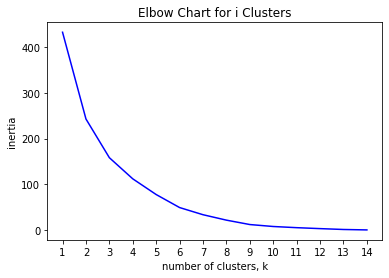

In [150]:
PC1Top = df[["Concerned about interaction of medicine w/Rx","Waging war on symptoms"]]

krange = range(1, 15)
xinertias = []

for i in krange:
    
    xmodel = KMeans(n_clusters=i)
    xmodel.fit(PC1Top)
    xinertias.append(xmodel.inertia_)
    
plt.plot(krange, xinertias, 'b')
plt.title("Elbow Chart for i Clusters")
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(krange)
plt.show()

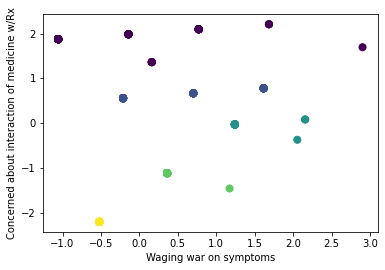

In [151]:
km = kmodes.KModes(n_clusters=5, init='Huang', n_init=20, verbose=0)
clusters = km.fit_predict(PC1Top)
PC1Top['clusters'] = clusters

pca = PCA(2)

plot_columns = pca.fit_transform(PC1Top)

plt.scatter(x=plot_columns[:,1], y=plot_columns[:,0], c=PC1Top["clusters"], s=50)
plt.xlabel("Waging war on symptoms")
plt.ylabel("Concerned about interaction of medicine w/Rx")
plt.xticks()
plt.yticks()
plt.show()

### PC-2 Top Two Features:

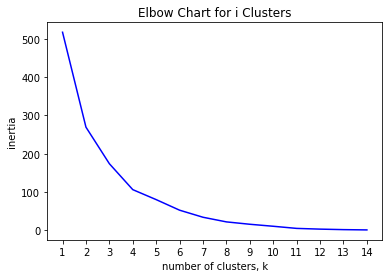

In [152]:
PC2Top = df[["Medicine that won't upset stomach","Concerned about interaction of medicine w/alcohol"]]

krange = range(1, 15)
xinertias = []

for i in krange:
    
    xmodel = KMeans(n_clusters=i)
    xmodel.fit(PC2Top)
    xinertias.append(xmodel.inertia_)
    
plt.plot(krange, xinertias, 'b')
plt.title("Elbow Chart for i Clusters")
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(krange)
plt.show()

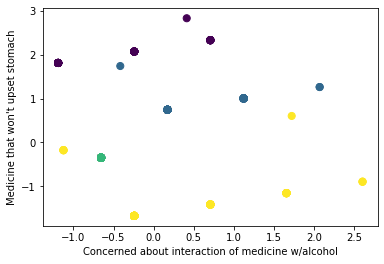

In [153]:
km = kmodes.KModes(n_clusters=4, init='Huang', n_init=20, verbose=0)
clusters = km.fit_predict(PC1Top)
PC1Top['clusters'] = clusters

pca = PCA(2)

plot_columns = pca.fit_transform(PC1Top)

plt.scatter(x=plot_columns[:,1], y=plot_columns[:,0], c=PC1Top["clusters"], s=50)
plt.xlabel("Concerned about interaction of medicine w/alcohol")
plt.ylabel("Medicine that won't upset stomach")
plt.xticks()
plt.yticks()
plt.show()

### PC-3 Top Two Features:

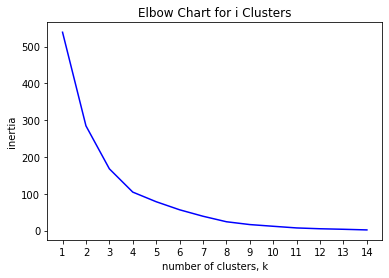

In [154]:
PC3Top = df[["Concerned about interaction of medicine w/Rx","Concerned about interaction of medicine w/alcohol"]]

krange = range(1, 15)
xinertias = []

for i in krange:
    
    xmodel = KMeans(n_clusters=i)
    xmodel.fit(PC3Top)
    xinertias.append(xmodel.inertia_)
    
plt.plot(krange, xinertias, 'b')
plt.title("Elbow Chart for i Clusters")
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(krange)
plt.show()

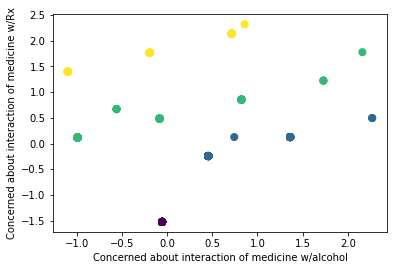

In [155]:
km = kmodes.KModes(n_clusters=4, init='Huang', n_init=20, verbose=0)
clusters = km.fit_predict(PC1Top)
PC1Top['clusters'] = clusters

pca = PCA(2)

plot_columns = pca.fit_transform(PC1Top)

plt.scatter(x=plot_columns[:,1], y=plot_columns[:,0], c=PC1Top["clusters"], s=50)
plt.xlabel("Concerned about interaction of medicine w/alcohol")
plt.ylabel("Concerned about interaction of medicine w/Rx")
plt.xticks()
plt.yticks()
plt.show()

Our team decided not to pursue a weighting scheme for the questions as we wanted each feature to have equal weights in order to properly segment the population. Further, we test for factor independence and exclude factors that do not strongly contribute to the segments. We feel that this is imporant for this assignment given that we have a general objective. If we were given a more specific goal in which we would need to conduct more targeted segmentation around features that were determined to be of great importance then we would include weighting.  

# Sources:

https://www.kdnuggets.com/2020/01/survey-segmentation-tutorial.html